<h1 style="text-align: center; color: red; font-size: 25pt; font-weight: bold; text-shadow: 1px 1px 1px rgb(50, 100, 100)"> Terror Attacks In Nigeria .... </h1> 
<p style="font-size: 12pt; text-align: center"> Abubakar Abdulkadir</p>

<img src="images/bg.jpg" style="width: 100%; height:350px; display: inline-block" />

<h1 style='background-color: red; padding: 10px; color: white'> 1.0 Introduction </h1>

In this section of the project, a comprehensive analysis of the dataset is conducted with the aim of elucidating the prominent factors that significantly influence security incidences in Nigeria, employing rigorous methods of hypothesis testing. The investigation encompasses a set of twenty enumerated hypotheses, posited as potential contributors to security crises. Each individual hypothesis is meticulously scrutinized and evaluated in light of the dataset, fostering a meticulous examination of their respective impacts.

<h1 style='background-color: red; padding: 10px; color: white'> 1.0 Hypothesis </h1>

1. The level of education significantly affects security incidences in Nigeria.
2. The level of isolation has a substantial impact on security incidences in Nigeria.
3. Natural barriers play a significant role in influencing security incidences in Nigeria.
4. Elevation has a notable influence on security incidences in Nigeria.
5. Population size has a significant correlation with security incidences in Nigeria.
6. The major occupation of a region significantly impacts security incidences in Nigeria.
7. Political stability has a significant effect on security incidences in Nigeria.
8. The economic situation significantly influences security incidences in Nigeria.
9. Access to food has a noteworthy impact on security incidences in Nigeria.
10. The employment rate has a significant correlation with security incidences in Nigeria.
11. Ethnic marginalization significantly affects security incidences in Nigeria.
12. The presence of well-developed transport infrastructure has a significant influence on security incidences in Nigeria.
13. Longitude exhibits a significant correlation with security incidences in Nigeria.
14. Latitude displays a significant correlation with security incidences in Nigeria.
15. Income equality significantly impacts security incidences in Nigeria.
16. The major ethnic group in a region has a significant effect on security incidences in Nigeria.
17. The availability of a robust communication network significantly influences security incidences in Nigeria.
18. Infrastructure development has a significant correlation with security incidences in Nigeria.
19. The dominant age group in a region significantly affects security incidences in Nigeria.

<h1 style='background-color: red; padding: 10px; color: white'> 2.0 Importing Dataset </h1>

In [5]:
import re
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#save dateset into the cleaned folder
df_acled = pd.read_csv('datasets/preprocessed/df_acled.csv')

# save this dataset into the cleaned folder
df_lga = pd.read_csv('datasets/preprocessed/df_lga.csv')

# save dataset as a new csv file
df_gtd = pd.read_csv('datasets/preprocessed/df_gtd.csv')

# save this dataset into the cleaned folder
df_lga_features = pd.read_csv('datasets/preprocessed/df_lga_features.csv')

<h1 style='background-color: red; padding: 10px; color: white'> 3.0 Data Analysis </h1>

## 3.1 Level of Education

### 3.1.1 Level of Education Using the Acled Dataset

For this purpose, the lga features dataset was merged with the acled dataset on the lga name feature. The education level feature is in the lga dataset while the acled dataset contains information about security incidences in different places in Nigeria.

In [15]:
# merge the ACLED dataset with the LGA features
df_acled = df_acled.rename(columns={'admin2': 'lga_name'}) # rename the admin2 to lga_name in acled
df_lga_features = df_lga_features.rename(columns={'Lga Name': 'lga_name'}) # rename the Lga Name to lga_name in LGA features dataset
df_acled_lga = pd.merge(df_acled, df_lga_features, on='lga_name')

#### 3.1.1.1 Distribution of Percentage of Educated by The Number of Security Incidences

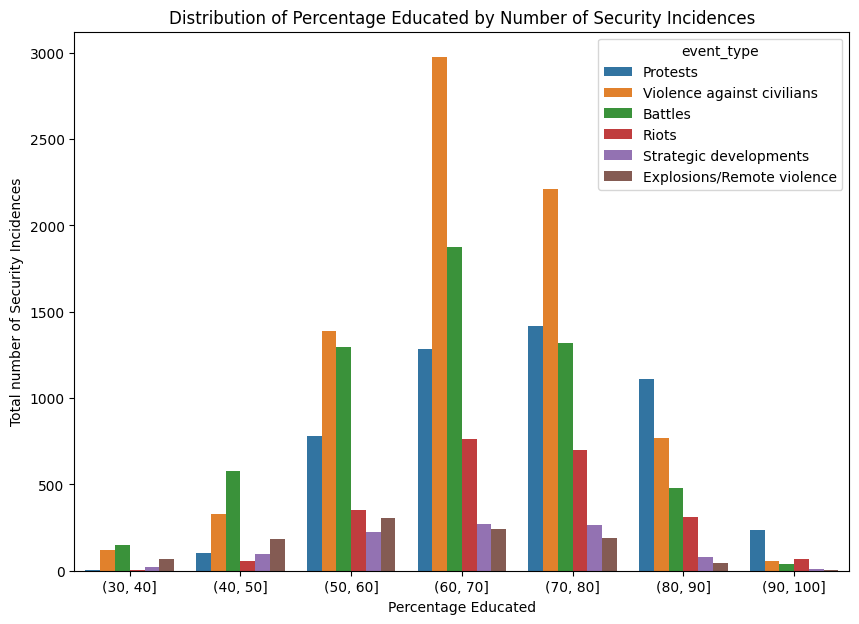

In [129]:
# Define the bin edges
bin_edges = [30, 40, 50, 60, 70, 80, 90, 100]  # Adjust the bin edges as desired


# Create a new column 'bin' by grouping 'x' values into bins
df_acled_lga['bin'] = pd.cut(df_acled_lga['percentage of educated'], bins=bin_edges)

# Setting the figure size
plt.figure(figsize=(10, 7))  # Adjust the width and height as desired

# Plotting line plot
sns.countplot(data=df_acled_lga, x='bin', hue='event_type')

# Adding labels and title
plt.xlabel('Percentage Educated')
plt.ylabel('Total number of Security Incidences')
plt.title('Distribution of Percentage Educated by Number of Security Incidences')

plt.show()

In [63]:
# Viewing the number of Local governments in each bin
pd.cut(df_lga_features['percentage of educated'], bins=bin_edges).value_counts()

(60, 70]     284
(70, 80]     220
(50, 60]     118
(80, 90]      75
(40, 50]      24
(30, 40]       4
(90, 100]      2
Name: percentage of educated, dtype: int64

The distribution chart shows the highest number of security incidences occuring where the percentage of educated persons are between 60 - 70 percent, followed by 70 - 80 percent. But a closer look at the total number of local governments within each bin, it can be seen that the chart is not a good representation of the effect of education on security in Nigeria. 60 - 70% has higher security incidences because, of the 774 local governments in Nigeria, 284 local governments fall under this class. Class 30-40 and class 90 - 100 have just 4 and 2 local governemts respectively. Hence, the reasons why they have smaller number of security incidences. A more appropriate metric would be to use average number of security incidences per class (SI).

$ SI = \frac{N}{ L} $

where N is the total security incidence in a class
and L is the number os local governments in the class

In [134]:
# get the local government counts in each bin
lga_value_counts = pd.cut(df_lga_features['percentage of educated'], bins=bin_edges).value_counts()

# get a list of all security event types
event_types = list(df_acled_lga['event_type'].unique())

['Protests',
 'Violence against civilians',
 'Battles',
 'Riots',
 'Strategic developments',
 'Explosions/Remote violence']

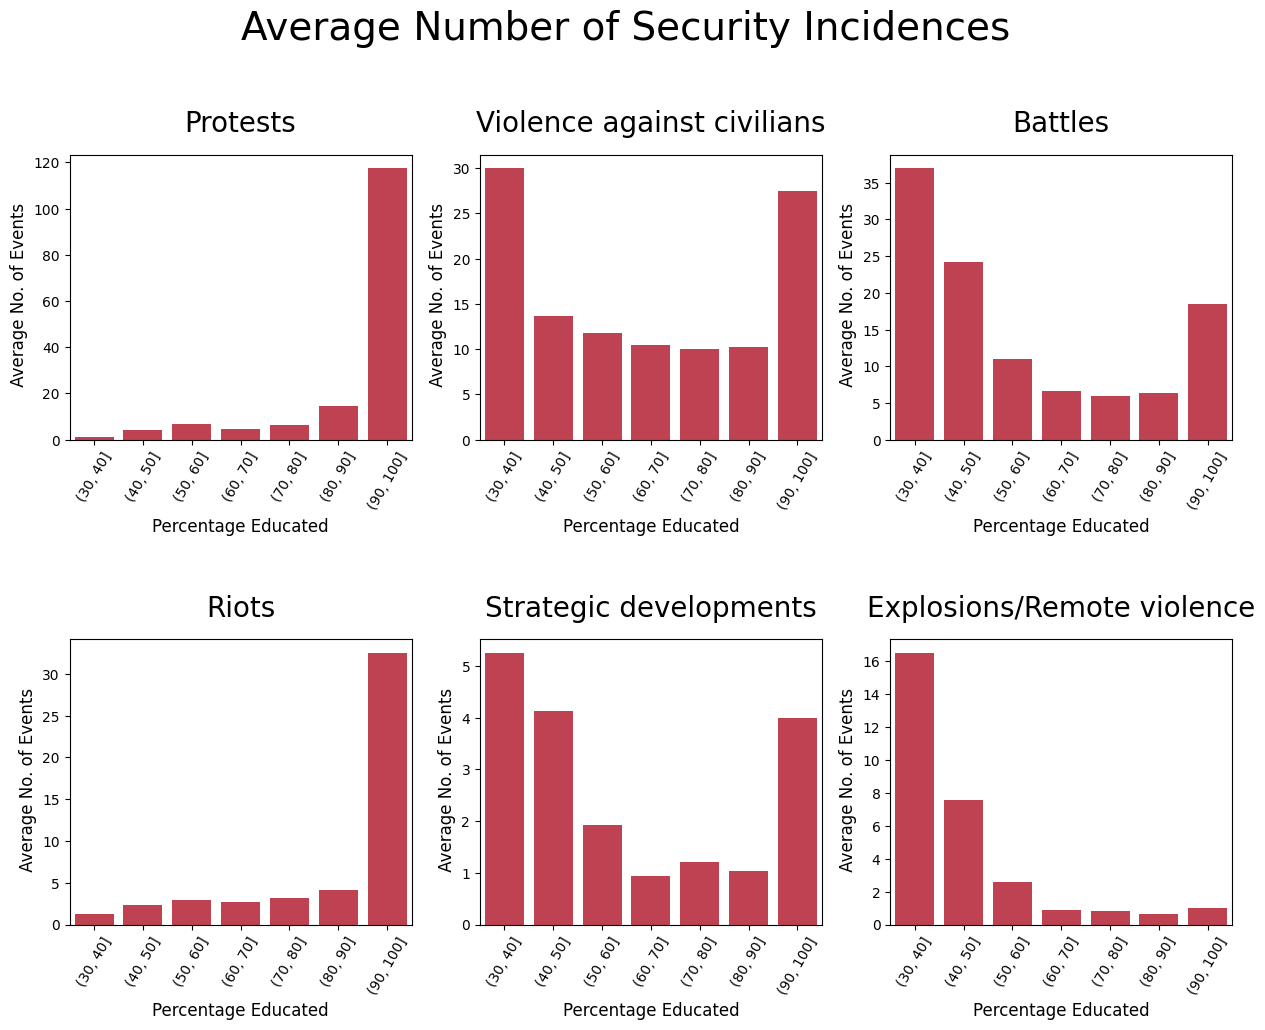

In [211]:
# Create a figure and axis objects using subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))


row, col = 0, 0

for index , event in enumerate(event_types):
    df = df_acled_lga[df_acled_lga['event_type'] == event]
    df = df['bin'].value_counts() / lga_value_counts
    
    col = index % 3
    if index > 2 : row = 1
    
    sns.barplot(x=df.index, y=df.values, ax=axes[row, col], color='#D32D41')
    axes[row, col].set_title('{}'.format(event), fontsize=20, y=1.05)
    axes[row, col].set_xlabel('Percentage Educated', fontsize=12)
    axes[row, col].set_ylabel(' Average No. of Events', fontsize=12)
    axes[row, col].tick_params(axis='x', rotation=60)
    plt.subplots_adjust(wspace=0.2, hspace=0.7)

    
plt.suptitle('Average Number of Security Incidences ', fontsize='28', y=1.025)
plt.show()

In [ ]:
# Setting the figure size
plt.figure(figsize=(10, 7))  # Adjust the width and height as desired

# Plotting line plot
sns.countplot(data=df_acled_lga, x='bin', hue='event_type')

# Adding labels and title
plt.xlabel('Percentage Educated')
plt.ylabel('Total number of Security Incidences')
plt.title('Distribution of Percentage Educated by Number of Security Incidences')

plt.show()

In [17]:
df_acled_lga.columns

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1', 'inter1',
       'actor2', 'inter2', 'interaction', 'iso', 'admin1', 'lga_name',
       'location', 'latitude', 'longitude', 'geo_precision', 'source',
       'source_scale', 'notes', 'fatalities', 'timestamp',
       'percentage of educated', 'Level of Isolation', 'Elevation',
       'Population', 'Major Ocupation', 'Political stability',
       'Economic Situation', 'Average Cost of living', 'Employment rate',
       'Ethnic Marginalization', 'Transport infrastructure', 'Longitude',
       'Latitude', 'Income Equality', 'Major ethnic group',
       'Communication network', 'Infrastructure development',
       'Dominant Age group', 'Average family size', 'Average education level',
       'Average Income in Naira', 'Has River', 'Has Swamp', 'Has Hill',
       'Has Forest', 'Has Mountain', 'Has ocean', 'Has valley', 'Has desert',
       'Has rock', 'Has plate

### FUNCTIONS

In [ ]:
def get_ratio(df, row):
    